In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("CleanData.csv")
df.drop('Index',axis=1 , inplace=True)
pd.set_option('display.max_columns', 500)

In [21]:
df.head()

,Price,Make,Model,Year,Passenger Doors,Passenger Capacity,Transmission,0-60 mph,EPA mileage (combined),Horsepower,Horsepower RPM,Torque,Torque RPM,Cylinders,Base engine size,First Gear Ratio,Second Gear Ratio,Third Gear Ratio,Fourth Gear Ratio,Fifth Gear Ratio,Sixth Gear Ratio,Seventh Gear Ratio,Eighth Gear Ratio,Final Drive Axle Ratio,Reverse Ratio,Front Suspension Type,Rear Suspension Type,Front Brake Rotor Diameter,Rear Brake Rotor Diameter,Front Tire Size,Rear Tire Size,Front Wheel Diameter,Rear Wheel Diameter,Front Wheel Width,Rear Wheel Width,Rear Tire Size.1,Spare Tire Size,Front Wheel Material,Rear Wheel Material,Spare Wheel Material,Curb weight,Fuel tank capacity,Length,Width,Height,Wheelbase,Front track,Rear track,Turning circle,Front head room,Front leg room,Front shoulder room,Front hip room,Rear head room,Rear leg room,Rear shoulder room,Rear hip room,4WD,AWD,FWD,RWD,Diesel,Electric,Flex Fuel,Gas,Hybrid,Rear Disc Brakes,Rear Drum Brakes
0,46300,Acura,MDX,2019,4,7,Transmission: 9-Speed Automatic -inc: Sequenti...,6.43,22.0,290,6200.0,267.0,4700.0,6,3.5,4.71,2.84,1.91,1.38,1.00,0.81,0.70,0.58,4.33,3.83,Strut,Multi-Link,12.6,13.0,P245/60HR18,P245/60HR18,18.0,18.0,8.0,8.0,P245/60HR18,Compact,Aluminum,Aluminum,NaN,4239.0,19.5,196.2,77.70,67.4,111.0,66.3,66.3,38.7,38.1,41.4,61.1,57.500000,38.3,38.5,59.1,57.80000,0,1,0,0,0,0,0,1,0,1,0
1,45500,Acura,RDX,2019,4,5,Transmission: 10-Speed Automatic -inc: sequent...,6.48,23.0,272,6500.0,280.0,1600.0,4,2.0,5.25,3.27,2.19,1.60,1.30,1.00,0.78,0.65,4.17,3.97,Strut,Multi-Link,12.4,12.2,P255/45VR20,P255/45VR20,20.0,20.0,8.0,8.0,P255/45VR20,NaN,Aluminum,Aluminum,NaN,4015.0,17.1,186.8,74.80,65.7,108.3,64.2,64.7,39.0,39.6,41.6,59.7,55.000000,38.3,38.4,56.6,49.90000,0,1,0,0,0,0,0,1,0,1,0
2,61900,Acura,RLX,2019,4,5,Transmission: 7-Speed Dual Clutch (DCT) -inc: ...,4.75,28.0,377,6500.0,341.0,4700.0,6,3.5,4.40,2.75,2.03,1.55,1.14,0.84,0.62,0.66,3.58,3.66,Double Wishbone,Multi-Link,13.0,12.2,P245/40WR19,P245/40WR19,19.0,19.0,8.0,8.0,P245/40WR19,NaN,Aluminum,Aluminum,NaN,4380.0,15.1,198.1,74.40,57.7,112.2,64.3,64.2,40.5,37.6,42.3,59.6,55.900000,36.9,38.8,57.0,54.50000,0,1,0,0,0,0,0,1,0,1,0
3,39400,Acura,TLX,2019,4,5,Transmission: 8-Speed Dual-Clutch,7.26,26.0,206,6800.0,182.0,4500.0,4,2.4,3.08,2.18,1.61,1.22,0.96,0.74,0.62,0.48,4.57,2.22,Strut,Multi-Link,12.6,12.2,P245/40VR19,P245/40VR19,19.0,19.0,8.0,8.0,P245/40VR19,NaN,Aluminum,Aluminum,NaN,3580.0,17.2,191.7,73.00,57.0,109.3,62.8,63.1,39.2,37.2,42.6,57.5,55.300000,36.7,34.5,55.4,54.90000,0,0,1,0,0,0,0,1,0,1,0
4,38900,Audi,A3 Cabriolet,2019,2,4,NaN,6.90,25.0,186,4400.0,221.0,1600.0,4,2.0,3.40,2.75,1.77,0.93,0.70,0.76,0.64,0.66,4.77,2.90,Strut,Multi-Link,12.3,10.7,P225/45HR17,P225/45HR17,17.0,17.0,7.5,7.5,P225/45HR17,Compact,Aluminum,Aluminum,Steel,3428.0,13.2,174.1,72.49,55.5,102.2,61.2,60.1,36.1,37.4,41.2,54.8,55.750606,36.3,31.9,45.7,54.27386,0,0,1,0,0,0,0,1,0,1,0


In [22]:
y = df['Price']
X = df[['Passenger Doors','Passenger Capacity','0-60 mph','EPA mileage (combined)','Horsepower','Torque','Cylinders','Base engine size',
      'First Gear Ratio','Second Gear Ratio','Third Gear Ratio','Fourth Gear Ratio','Fifth Gear Ratio','Sixth Gear Ratio','Seventh Gear Ratio',
      'Eighth Gear Ratio','Final Drive Axle Ratio','Reverse Ratio','Front Brake Rotor Diameter','Rear Brake Rotor Diameter','Front Wheel Diameter',
      'Rear Wheel Diameter','Front Wheel Width','Rear Wheel Width','Curb weight','Fuel tank capacity','Length','Width','Height','Wheelbase','Front track',
      'Rear track','Turning circle','Front head room','Front leg room','Front shoulder room','Front hip room','Rear head room','Rear leg room',
      'Rear shoulder room','Rear hip room','4WD','AWD','FWD','RWD','Diesel','Electric','Flex Fuel','Gas','Hybrid','Rear Disc Brakes','Rear Drum Brakes']]

In [23]:
# Creating train and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=26)

_______
### Visual study of relationships between variables (determining if some polynomial or even a clean logarithmic/exponential relationship exists)
__________

Text(0.5,1,'Torque vs. Price')

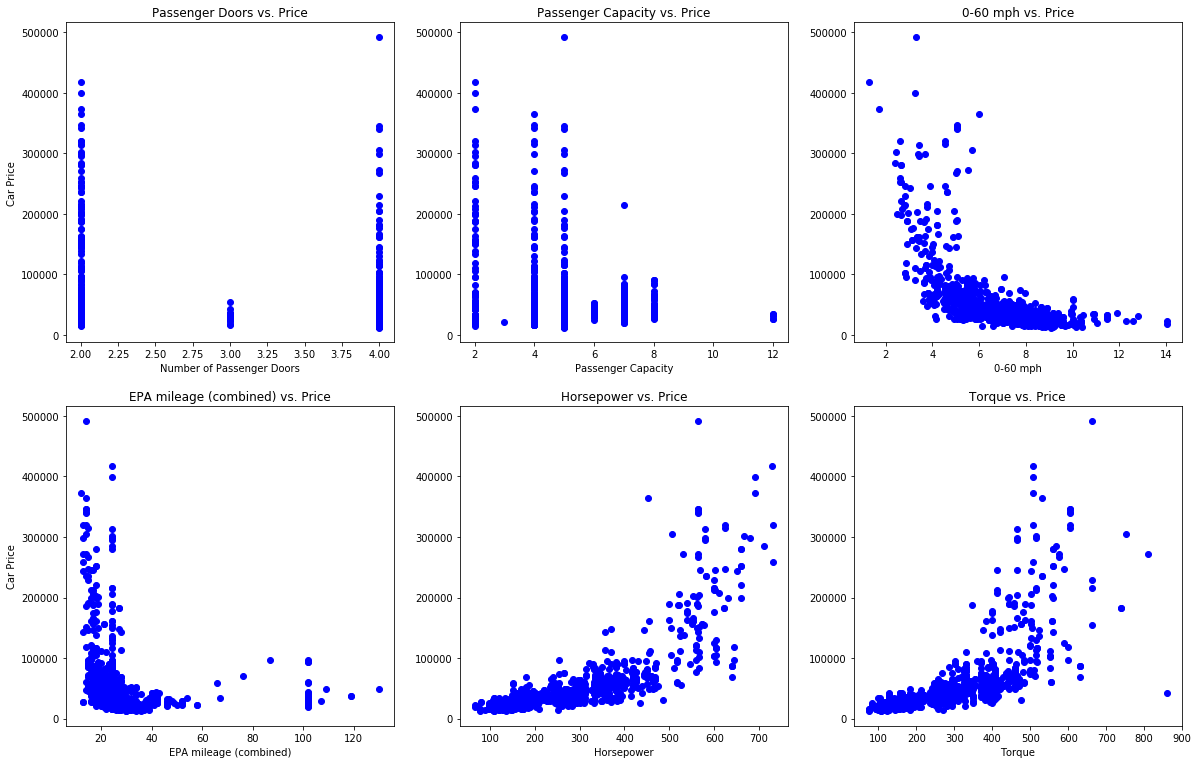

In [30]:
# Clearly identified non-linear relationships:
# 0-60 mph

plt.figure(figsize=[20,20])
# Relationship between y and 'Passenger Doors' is not clear
plt.subplot(331)
#plt.figure(figsize=[5,5])
plt.plot(X['Passenger Doors'],y,'bo')
plt.xlabel('Number of Passenger Doors')
plt.ylabel('Car Price')
plt.title('Passenger Doors vs. Price')

# Passenger Capacity might have a negative relationship with price
plt.subplot(332)
#plt.figure(figsize=[5,5])
plt.plot(X['Passenger Capacity'],y,'bo')
plt.xlabel('Passenger Capacity')
# plt.ylabel('Car Price')
plt.title('Passenger Capacity vs. Price')

# NON-LINEAR negative RELATIONSHIP BETWEEN price and 0-60 mph
plt.subplot(333)
#plt.figure(figsize=[5,5])
plt.plot(X['0-60 mph'],y,'bo')
plt.xlabel('0-60 mph')
# plt.ylabel('Car Price')
plt.title('0-60 mph vs. Price')

# Most expensive cars all seem to be below 30 mpg. Not much of a clear relationship visible.
plt.subplot(334)
# plt.figure(figsize=[5,5])
plt.plot(X['EPA mileage (combined)'],y,'bo')
plt.xlabel('EPA mileage (combined)')
plt.ylabel('Car Price')
plt.title('EPA mileage (combined) vs. Price')

# Linear relationship appears visible until the ~400hp range before price substantially increases. Possibly representable by a piecewise function
# plt.figure(figsize=[5,5])
plt.subplot(335)
plt.plot(X['Horsepower'],y,'bo')
plt.xlabel('Horsepower')
plt.title('Horsepower vs. Price')

# Expectedly, torque and hp likely exhibit a degree of multicollinearity. A similar relationship seems to exist here.
# plt.figure(figsize=[5,5])
plt.subplot(336)
plt.plot(X['Torque'],y,'bo')
plt.xlabel('Torque')
# plt.ylabel('Car Price')
plt.title('Torque vs. Price')